# importations

In [173]:
import pandas as pd
import numpy as np
from fonctions import *

# examine data

In [174]:
data=pd.read_csv('messy_data.csv',sep=';')
data

,location,date_of_sale,number_of_bedrooms,price,type
0,Clapham,12/04/1999,1,"£729,000",apartment
1,Ashford,05/08/2017,unknown,"£699,000",semi-detached
2,Stratford-on-Avon,29/03/2012,3,NaN,detached
3,Canterbury,01/07/2009,2,"£529,000",teraced
4,Camden,16/12/2001,1,"£616,000",apartment
5,Rugby,01/03/2003,-,"£247,000",detached
6,Hampstead,05/03/2016,2,£0,terraced
7,Clapham,05/07/2001,363,"£543,000",apartment
8,Stratford-on-Avon,10th May 2010,3,"£420,000",detached
9,Camden,16/12/2001,1,"£616,000",apartment


In [175]:
data.dtypes

location              object
date_of_sale          object
number_of_bedrooms    object
price                 object
type                  object
dtype: object

In [176]:
data.isnull().mean()

location              0.0
date_of_sale          0.0
number_of_bedrooms    0.0
price                 0.1
type                  0.0
dtype: float64

In [177]:
data['date_of_sale']=pd.to_datetime(data['date_of_sale'])
data.dtypes

location                      object
date_of_sale          datetime64[ns]
number_of_bedrooms            object
price                         object
type                          object
dtype: object

In [178]:
data

,location,date_of_sale,number_of_bedrooms,price,type
0,Clapham,1999-12-04,1,"£729,000",apartment
1,Ashford,2017-05-08,unknown,"£699,000",semi-detached
2,Stratford-on-Avon,2012-03-29,3,NaN,detached
3,Canterbury,2009-01-07,2,"£529,000",teraced
4,Camden,2001-12-16,1,"£616,000",apartment
5,Rugby,2003-01-03,-,"£247,000",detached
6,Hampstead,2016-05-03,2,£0,terraced
7,Clapham,2001-05-07,363,"£543,000",apartment
8,Stratford-on-Avon,2010-05-10,3,"£420,000",detached
9,Camden,2001-12-16,1,"£616,000",apartment


In [179]:
non_nums=data[~data['number_of_bedrooms'].str.isnumeric()]['number_of_bedrooms'].unique()
data['number_of_bedrooms']=data['number_of_bedrooms'].replace(non_nums,np.nan)
data['number_of_bedrooms']

0      1
1    NaN
2      3
3      2
4      1
5    NaN
6      2
7    363
8      3
9      1
Name: number_of_bedrooms, dtype: object

In [180]:
data['number_of_bedrooms']=pd.to_numeric(data['number_of_bedrooms'])
data.dtypes

location                      object
date_of_sale          datetime64[ns]
number_of_bedrooms           float64
price                         object
type                          object
dtype: object

In [181]:
data

,location,date_of_sale,number_of_bedrooms,price,type
0,Clapham,1999-12-04,1.0,"£729,000",apartment
1,Ashford,2017-05-08,NaN,"£699,000",semi-detached
2,Stratford-on-Avon,2012-03-29,3.0,NaN,detached
3,Canterbury,2009-01-07,2.0,"£529,000",teraced
4,Camden,2001-12-16,1.0,"£616,000",apartment
5,Rugby,2003-01-03,NaN,"£247,000",detached
6,Hampstead,2016-05-03,2.0,£0,terraced
7,Clapham,2001-05-07,363.0,"£543,000",apartment
8,Stratford-on-Avon,2010-05-10,3.0,"£420,000",detached
9,Camden,2001-12-16,1.0,"£616,000",apartment


In [182]:
data['price']=data['price'].apply(lambda x:x.replace('£','')if type(x) is str else x)
data['price']

0    729,000
1    699,000
2        NaN
3    529,000
4    616,000
5    247,000
6          0
7    543,000
8    420,000
9    616,000
Name: price, dtype: object

In [183]:
data['price']=data['price'].apply(lambda x:x.replace(',','')if type(x) is str else x)
data['price']

0    729000
1    699000
2       NaN
3    529000
4    616000
5    247000
6         0
7    543000
8    420000
9    616000
Name: price, dtype: object

In [184]:
data['price']=pd.to_numeric(data['price'])
data.dtypes

location                      object
date_of_sale          datetime64[ns]
number_of_bedrooms           float64
price                        float64
type                          object
dtype: object

In [185]:
data

,location,date_of_sale,number_of_bedrooms,price,type
0,Clapham,1999-12-04,1.0,729000.0,apartment
1,Ashford,2017-05-08,NaN,699000.0,semi-detached
2,Stratford-on-Avon,2012-03-29,3.0,NaN,detached
3,Canterbury,2009-01-07,2.0,529000.0,teraced
4,Camden,2001-12-16,1.0,616000.0,apartment
5,Rugby,2003-01-03,NaN,247000.0,detached
6,Hampstead,2016-05-03,2.0,0.0,terraced
7,Clapham,2001-05-07,363.0,543000.0,apartment
8,Stratford-on-Avon,2010-05-10,3.0,420000.0,detached
9,Camden,2001-12-16,1.0,616000.0,apartment


In [186]:
data['price']=data['price'].replace([0],np.nan)
data

,location,date_of_sale,number_of_bedrooms,price,type
0,Clapham,1999-12-04,1.0,729000.0,apartment
1,Ashford,2017-05-08,NaN,699000.0,semi-detached
2,Stratford-on-Avon,2012-03-29,3.0,NaN,detached
3,Canterbury,2009-01-07,2.0,529000.0,teraced
4,Camden,2001-12-16,1.0,616000.0,apartment
5,Rugby,2003-01-03,NaN,247000.0,detached
6,Hampstead,2016-05-03,2.0,NaN,terraced
7,Clapham,2001-05-07,363.0,543000.0,apartment
8,Stratford-on-Avon,2010-05-10,3.0,420000.0,detached
9,Camden,2001-12-16,1.0,616000.0,apartment


In [187]:
data['type']=data['type'].replace(['teraced'],'terraced')
data['type'].unique()

array(['apartment', 'semi-detached', 'detached', 'terraced'], dtype=object)

In [188]:
data

,location,date_of_sale,number_of_bedrooms,price,type
0,Clapham,1999-12-04,1.0,729000.0,apartment
1,Ashford,2017-05-08,NaN,699000.0,semi-detached
2,Stratford-on-Avon,2012-03-29,3.0,NaN,detached
3,Canterbury,2009-01-07,2.0,529000.0,terraced
4,Camden,2001-12-16,1.0,616000.0,apartment
5,Rugby,2003-01-03,NaN,247000.0,detached
6,Hampstead,2016-05-03,2.0,NaN,terraced
7,Clapham,2001-05-07,363.0,543000.0,apartment
8,Stratford-on-Avon,2010-05-10,3.0,420000.0,detached
9,Camden,2001-12-16,1.0,616000.0,apartment


# Outliers:valeur aberrant

In [189]:
find_outliers(data.number_of_bedrooms)

(array([7]),)

In [190]:
find_outliers(data.price)

(array([5]),)

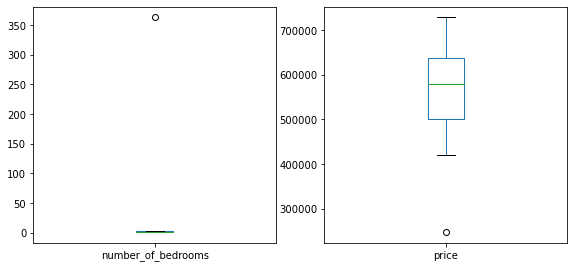

In [191]:
boxPlotAll(data[["number_of_bedrooms","price"]])

In [192]:
data.loc[7,'number_of_bedrooms']=np.nan

In [193]:
data=data.drop(7)

In [194]:
data

,location,date_of_sale,number_of_bedrooms,price,type
0,Clapham,1999-12-04,1.0,729000.0,apartment
1,Ashford,2017-05-08,NaN,699000.0,semi-detached
2,Stratford-on-Avon,2012-03-29,3.0,NaN,detached
3,Canterbury,2009-01-07,2.0,529000.0,terraced
4,Camden,2001-12-16,1.0,616000.0,apartment
5,Rugby,2003-01-03,NaN,247000.0,detached
6,Hampstead,2016-05-03,2.0,NaN,terraced
8,Stratford-on-Avon,2010-05-10,3.0,420000.0,detached
9,Camden,2001-12-16,1.0,616000.0,apartment


In [195]:
#data=data.drop('7')

In [196]:
data

,location,date_of_sale,number_of_bedrooms,price,type
0,Clapham,1999-12-04,1.0,729000.0,apartment
1,Ashford,2017-05-08,NaN,699000.0,semi-detached
2,Stratford-on-Avon,2012-03-29,3.0,NaN,detached
3,Canterbury,2009-01-07,2.0,529000.0,terraced
4,Camden,2001-12-16,1.0,616000.0,apartment
5,Rugby,2003-01-03,NaN,247000.0,detached
6,Hampstead,2016-05-03,2.0,NaN,terraced
8,Stratford-on-Avon,2010-05-10,3.0,420000.0,detached
9,Camden,2001-12-16,1.0,616000.0,apartment


# duplicates

In [197]:
data[data.duplicated()]

,location,date_of_sale,number_of_bedrooms,price,type
9,Camden,2001-12-16,1.0,616000.0,apartment


In [198]:
data=data.drop_duplicates()
data

,location,date_of_sale,number_of_bedrooms,price,type
0,Clapham,1999-12-04,1.0,729000.0,apartment
1,Ashford,2017-05-08,NaN,699000.0,semi-detached
2,Stratford-on-Avon,2012-03-29,3.0,NaN,detached
3,Canterbury,2009-01-07,2.0,529000.0,terraced
4,Camden,2001-12-16,1.0,616000.0,apartment
5,Rugby,2003-01-03,NaN,247000.0,detached
6,Hampstead,2016-05-03,2.0,NaN,terraced
8,Stratford-on-Avon,2010-05-10,3.0,420000.0,detached


# dealing with nulls

## 1st way: by dropping every single columns which contain NaN value

In [199]:
dropCols=data.dropna(axis=1)

In [200]:
dropCols

,location,date_of_sale,type
0,Clapham,1999-12-04,apartment
1,Ashford,2017-05-08,semi-detached
2,Stratford-on-Avon,2012-03-29,detached
3,Canterbury,2009-01-07,terraced
4,Camden,2001-12-16,apartment
5,Rugby,2003-01-03,detached
6,Hampstead,2016-05-03,terraced
8,Stratford-on-Avon,2010-05-10,detached


In [201]:
dropRow=data.dropna()
dropRow

,location,date_of_sale,number_of_bedrooms,price,type
0,Clapham,1999-12-04,1.0,729000.0,apartment
3,Canterbury,2009-01-07,2.0,529000.0,terraced
4,Camden,2001-12-16,1.0,616000.0,apartment
8,Stratford-on-Avon,2010-05-10,3.0,420000.0,detached


## 2nd method is:inpute the nulls value by the mean or median

In [210]:
#mean=data['number_of_bedrooms'].mean()
#data['number_of_bedrooms']=data['number_of_bedrooms'].fillna(value=mean)

,location,date_of_sale,number_of_bedrooms,price,type
0,Clapham,1999-12-04,1.0,729000.0,apartment
1,Ashford,2017-05-08,2.0,699000.0,semi-detached
2,Stratford-on-Avon,2012-03-29,3.0,NaN,detached
3,Canterbury,2009-01-07,2.0,529000.0,terraced
4,Camden,2001-12-16,1.0,616000.0,apartment
5,Rugby,2003-01-03,2.0,247000.0,detached
6,Hampstead,2016-05-03,2.0,NaN,terraced
8,Stratford-on-Avon,2010-05-10,3.0,420000.0,detached


In [211]:
data

,location,date_of_sale,number_of_bedrooms,price,type
0,Clapham,1999-12-04,1.0,729000.0,apartment
1,Ashford,2017-05-08,2.0,699000.0,semi-detached
2,Stratford-on-Avon,2012-03-29,3.0,NaN,detached
3,Canterbury,2009-01-07,2.0,529000.0,terraced
4,Camden,2001-12-16,1.0,616000.0,apartment
5,Rugby,2003-01-03,2.0,247000.0,detached
6,Hampstead,2016-05-03,2.0,NaN,terraced
8,Stratford-on-Avon,2010-05-10,3.0,420000.0,detached


# 3td way:groupby caracteristics which is very use and sofisticate

In [213]:
data["price"]=data.groupby(["number_of_bedrooms"])["price"].transform(lambda x:x.fillna(x.mean()))
#data.groupby(["number_of_bedrooms"])["price"].mean()
data

<ipython-input-213-d53cb59be678>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["price"]=data.groupby(["number_of_bedrooms"])["price"].transform(lambda x:x.fillna(x.mean()))


,location,date_of_sale,number_of_bedrooms,price,type
0,Clapham,1999-12-04,1.0,729000.000000,apartment
1,Ashford,2017-05-08,2.0,699000.000000,semi-detached
2,Stratford-on-Avon,2012-03-29,3.0,420000.000000,detached
3,Canterbury,2009-01-07,2.0,529000.000000,terraced
4,Camden,2001-12-16,1.0,616000.000000,apartment
5,Rugby,2003-01-03,2.0,247000.000000,detached
6,Hampstead,2016-05-03,2.0,491666.666667,terraced
8,Stratford-on-Avon,2010-05-10,3.0,420000.000000,detached
